In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("SWaT_Dataset_Normal_v1.csv")
df = df.iloc[21600:]

y = df["Normal/Attack"]
del df["Normal/Attack"]

In [3]:
df.shape

(475200, 52)

In [4]:
X = np.array(df)
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [5]:
visible = Input(shape=(n_inputs,))

e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

output = Dense(n_inputs, activation='linear')(d)

In [7]:
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
dense (Dense)                (None, 104)               5512      
_________________________________________________________________
batch_normalization (BatchNo (None, 104)               416       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 104)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 52)                5460      
_________________________________________________________________
batch_normalization_1 (Batch (None, 52)                208       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 52)                0     

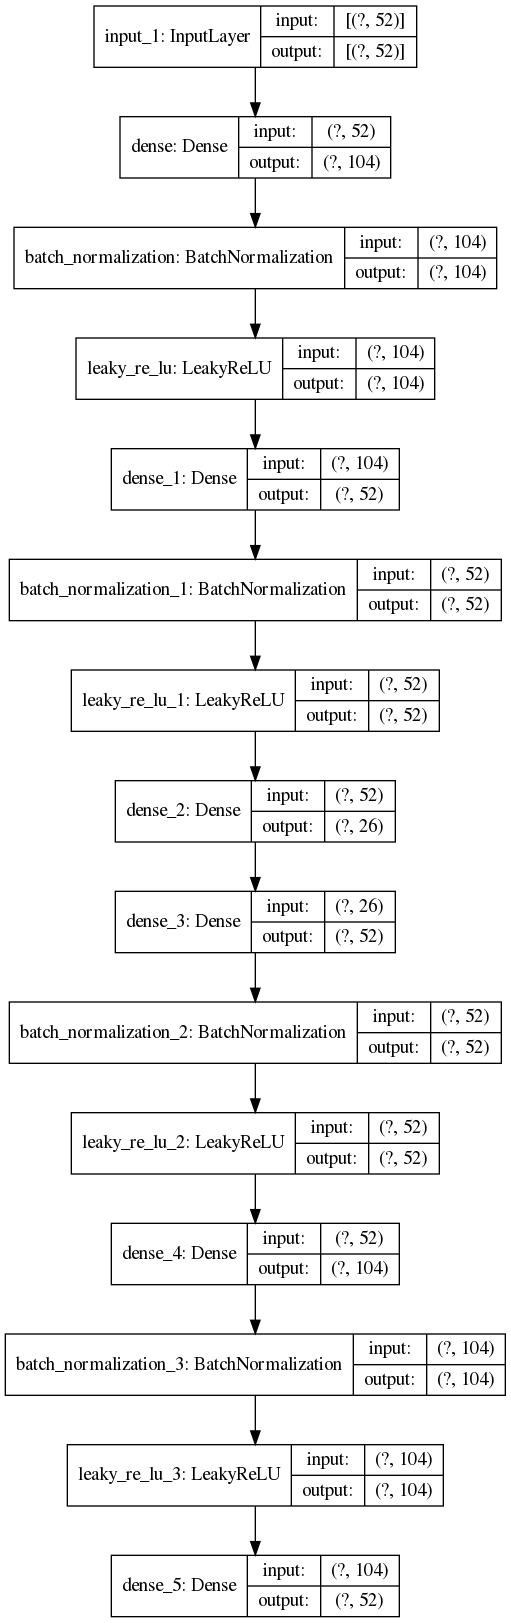

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [9]:
history = model.fit(X_train, X_train, epochs=5, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Train on 318384 samples, validate on 156816 samples
Epoch 1/5


2021-12-19 08:00:12.071877: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1


318384/318384 - 133s - loss: 0.0055 - val_loss: 8.8840e-04
Epoch 2/5
318384/318384 - 131s - loss: 0.0019 - val_loss: 6.8779e-04
Epoch 3/5
318384/318384 - 137s - loss: 0.0014 - val_loss: 4.9271e-04
Epoch 4/5
318384/318384 - 134s - loss: 0.0011 - val_loss: 5.2989e-04
Epoch 5/5
318384/318384 - 133s - loss: 9.9395e-04 - val_loss: 4.0261e-04


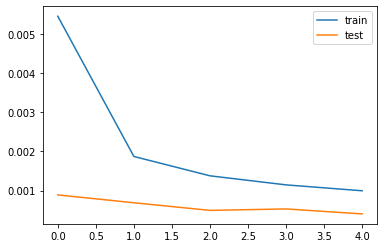

In [11]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.savefig("ae_history_chart.png")
pyplot.show()

In [8]:
encoder = Model(inputs=visible, outputs=bottleneck)

encoder.save('encoder.h5')

In [9]:
#PREDICT
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [10]:
encoder = load_model('encoder.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

In [18]:
df = np.concatenate((X_train_encode, X_test_encode))

(281199, 26)
(92796, 26)
<class 'numpy.ndarray'>


In [12]:
#TADGAN HERE! GET THE Y_HAT
from optimum import main

In [13]:
acc = accuracy_score(y_test, yhat)
print(acc)

NameError: name 'yhat' is not defined